# Assignment 2 for Stochastic Hydrology

In [1]:
import numpy as np
import scipy.stats as ss
import HW1_utils # file with all functions for distribution fitting and plotting
from matplotlib import pyplot as plt
import pandas as pd
import math

%matplotlib inline

# load data
maxQ = np.loadtxt('Table6.2.csv', skiprows=1, delimiter = ',', usecols=[1])

### Homework Problems 3

(array([6., 5., 7., 8., 4., 1., 4., 1., 3., 1.]),
 array([ 410.,  717., 1024., 1331., 1638., 1945., 2252., 2559., 2866.,
        3173., 3480.]),
 <a list of 10 Patch objects>)

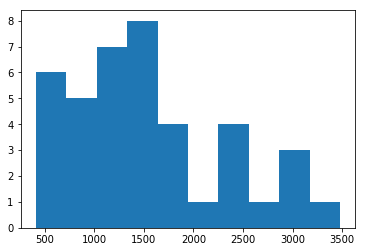

In [10]:
plt.hist(maxQ)

In [21]:
# Test whether the skew is different from the normal distribution
ss.skewtest(maxQ)

SkewtestResult(statistic=1.889183117775271, pvalue=0.058867296059842186)

### Homework Problems 4

#### 1) Calculate parameter values

In [2]:
# fit 2-parameter Gamma with MOM
alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2 = HW1_utils.fitGamma(maxQ, 'MOM', 2)
alpha_Gamma_MOM2, xi_Gamma_MOM2, beta_Gamma_MOM2

(3.626571549642084, 0, 0.002340931803280457)

In [3]:
# fit 2-parameter Gamma with MLE
alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2 = HW1_utils.fitGamma(maxQ, 'MLE', 2)
alpha_Gamma_MLE2, xi_Gamma_MLE2, beta_Gamma_MLE2

(3.6433952198805817, 0, 0.0023517913890269697)

In [4]:
# fit Log-Pearson Type 3 using MOM
# if skew is negative, beta will be negative, which Python doesn't allow
# so fit to -log(data) and transform back
if ss.skew(np.log(maxQ),bias=False) < 0:
    alpha_LP3_MOM, xi_LP3_MOM, beta_LP3_MOM = HW1_utils.fitGamma(-np.log(maxQ), 'MOM', 3)
# if skew is positive, beta will be positive, which Python does allow
# so fit to +log(data) and transform back
else:
    alpha_LP3_MOM, x_LP3_MOMi, beta_LP3_MOM = HW1_utils.fitGamma(np.log(maxQ), 'MOM', 3)    

In [5]:
# fit Log-Pearson Type 3 using MLE
alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE = HW1_utils.fitGamma(np.log(maxQ), 'MLE', 3)
alpha_LP3_MLE, xi_LP3_MLE, beta_LP3_MLE

(320.07965927648956, -2.852647250408456, 31.834390381442926)

In [6]:
# fit Gumbel using MLE
xi_Gumbel_MLE, alpha_Gumbel_MLE = HW1_utils.fitGumbel(maxQ, 'MLE')
xi_Gumbel_MLE, alpha_Gumbel_MLE

(1177.4043092004997, 629.3798508294669)

In [7]:
# fit GEV using MLE
kappa_GEV_MLE, xi_GEV_MLE, alpha_GEV_MLE = HW1_utils.fitGEV(maxQ, 'MLE')
kappa_GEV_MLE, xi_GEV_MLE, alpha_GEV_MLE

(-0.035918510561574524, 1165.3845010967693, 620.2283038005058)

#### 2) Create Functions of PPCT for each distribution

In [29]:
# perform probability plot correlation test
def GammaPPCT(data, alpha, beta, xi):
    
    x_sorted = np.sort(data)
    p_observed = np.arange(1,len(x_sorted)+1,1)/(len(data)+1)

    x_fitted = ss.gamma.ppf(p_observed, alpha, xi, 1/beta)
    rho = np.corrcoef(x_sorted, x_fitted)[0,1]
    print(rho)
    plt.scatter(x_sorted, x_fitted)
    plt.plot(x_sorted,x_sorted,color='r')
    plt.xlabel('Observed_Flow (m^3/s)')
    plt.ylabel('Fitted_Flow (m^3/s)')
    #generate M synthetic samples of n observations
    rhoVector = np.zeros(10000)
    for i in range(10000):
        x= ss.gamma.rvs(alpha, xi, 1/beta, len(data))
        rhoVector[i] = np.corrcoef(np.sort(x), x_fitted)[0,1]
    
    count = 0
    for i in range(len(rhoVector)):
        if rho < rhoVector[i]:
            count = count+1
    print(count)
    p_value = 1-float(count)/10000
    return rho, p_value

In [30]:
# perform probability plot correlation test
def LP3PPCT(data, alpha, beta, xi):
    
    x_sorted = np.sort(data)
    p_observed = np.arange(1,len(x_sorted)+1,1)/(len(data)+1)

    x_fitted = ss.gamma.ppf(p_observed, alpha, xi, 1/beta)
    rho = np.corrcoef(x_sorted, x_fitted)[0,1]
    print(rho)
    plt.scatter(x_sorted, x_fitted)
    plt.plot(x_sorted,x_sorted,color='r')
    plt.xlabel('Observed_Flow (m^3/s)')
    plt.ylabel('Fitted_Flow (m^3/s)')
    #generate M synthetic samples of n observations
    rhoVector = np.zeros(10000)
    for i in range(10000):
        x= ss.gamma.rvs(alpha, xi, 1/beta, len(data))
        rhoVector[i] = np.corrcoef(np.sort(x), x_fitted)[0,1]
    
    count = 0
    for i in range(len(rhoVector)):
        if rho < rhoVector[i]:
            count = count+1
    print(count)
    p_value = 1-float(count)/10000
    return rho, p_value

In [31]:
# perform probability plot correlation test
def GumbelPPCT(data, alpha, xi):
    
    x_sorted = np.sort(data)
    p_observed = np.arange(1,len(x_sorted)+1,1)/(len(data)+1)

    x_fitted = ss.gamma.ppf(p_observed, alpha, xi)
    rho = np.corrcoef(x_sorted, x_fitted)[0,1]
    print(rho)
    plt.scatter(x_sorted, x_fitted)
    plt.plot(x_sorted,x_sorted,color='r')
    plt.xlabel('Observed_Flow (m^3/s)')
    plt.ylabel('Fitted_Flow (m^3/s)')
    #generate M synthetic samples of n observations
    rhoVector = np.zeros(10000)
    for i in range(10000):
        x= ss.gamma.rvs(alpha, xi, len(data))
        rhoVector[i] = np.corrcoef(np.sort(x), x_fitted)[0,1]
    
    count = 0
    for i in range(len(rhoVector)):
        if rho < rhoVector[i]:
            count = count+1
    print(count)
    p_value = 1-float(count)/10000
    return rho, p_value

In [32]:
# perform probability plot correlation test
def GumbelPPCT(data, alpha, xi):
    
    x_sorted = np.sort(data)
    p_observed = np.arange(1,len(x_sorted)+1,1)/(len(data)+1)

    x_fitted = ss.gumbel_r.ppf(p_observed, alpha, xi)
    rho = np.corrcoef(x_sorted, x_fitted)[0,1]
    print(rho)
    plt.scatter(x_sorted, x_fitted)
    plt.plot(x_sorted,x_sorted,color='r')
    plt.xlabel('Observed_Flow (m^3/s)')
    plt.ylabel('Fitted_Flow (m^3/s)')
    #generate M synthetic samples of n observations
    rhoVector = np.zeros(10000)
    for i in range(10000):
        x= ss.gumbel_r.rvs(alpha, xi, len(data))
        rhoVector[i] = np.corrcoef(np.sort(x), x_fitted)[0,1]
    
    count = 0
    for i in range(len(rhoVector)):
        if rho < rhoVector[i]:
            count = count+1
    print(count)
    p_value = 1-float(count)/10000
    return rho, p_value

In [33]:
# perform probability plot correlation test
def GEVPPCT(data, kappa, xi, alpha):
    
    x_sorted = np.sort(data)
    p_observed = np.arange(1,len(x_sorted)+1,1)/(len(data)+1)

    x_fitted = ss.genextreme.ppf(p_observed, kappa, xi, alpha)
    rho = np.corrcoef(x_sorted, x_fitted)[0,1]
    print(rho)
    plt.scatter(x_sorted, x_fitted)
    plt.plot(x_sorted,x_sorted,color='r')
    plt.xlabel('Observed_Flow (m^3/s)')
    plt.ylabel('Fitted_Flow (m^3/s)')
    #generate M synthetic samples of n observations
    rhoVector = np.zeros(10000)
    for i in range(10000):
        x= ss.genextreme.rvs(kappa, xi, alpha, len(data))
        rhoVector[i] = np.corrcoef(np.sort(x), x_fitted)[0,1]
    
    count = 0
    for i in range(len(rhoVector)):
        if rho < rhoVector[i]:
            count = count+1
    print(count)
    p_value = 1-float(count)/10000
    return rho, p_value

#### (a) 2-parameter Gamma using MOM

0.9912418647339382
2881
0.9912418647339382   0.7119


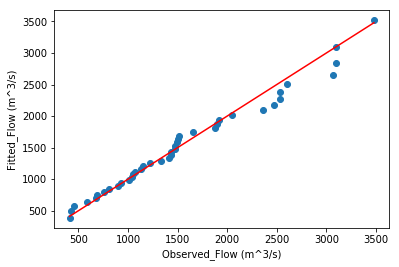

In [34]:
rho_Gamma_PPCT, p_Gamma_PPCT = GammaPPCT(maxQ, alpha_Gamma_MOM2, beta_Gamma_MOM2, xi_Gamma_MOM2)
print(rho_Gamma_PPCT, " " , p_Gamma_PPCT)

#### (b) 2-parameter Gamma using MLE

0.9912411832993692
2956
0.9912411832993692   0.7044


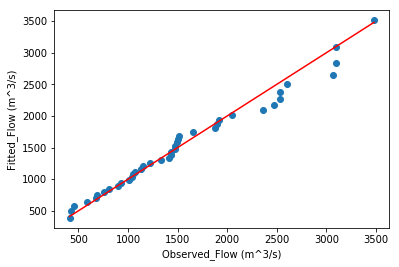

In [35]:
rho_Gamma_PPCT, p_Gamma_PPCT = GammaPPCT(maxQ, alpha_Gamma_MLE2, beta_Gamma_MLE2, xi_Gamma_MLE2)
print(rho_Gamma_PPCT, " " , p_Gamma_PPCT)

#### (c) Log-Pearson Type 3 using MOM

0.9934451485510513
1559
0.9934451485510513   0.8441


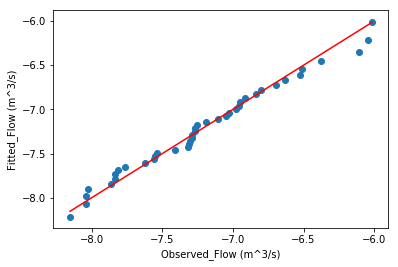

In [36]:
rho_LP3_MOM_PPCT, p_LP3_MOM_PPCT = LP3PPCT(-np.log(maxQ), alpha_LP3_MOM, beta_LP3_MOM, xi_LP3_MOM)
print(rho_LP3_MOM_PPCT, " " , p_LP3_MOM_PPCT)

#### (d) Log-Pearson Type 3 using MLE

0.9875128889647798
5546
0.9875128889647798   0.4454


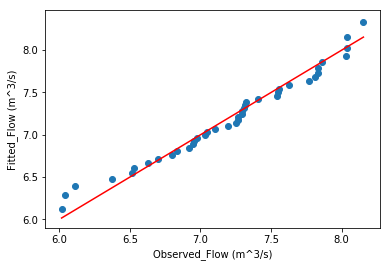

In [37]:
rho_LP3_MLE_PPCT, p_LP3_MLE_PPCT = LP3PPCT(np.log(maxQ), alpha_LP3_MLE, beta_LP3_MLE, xi_LP3_MLE)
print(rho_LP3_MLE_PPCT, " " , p_LP3_MLE_PPCT)

#### (e) Gumbel using MLE

0.989949098382466
3230
0.989949098382466   0.677


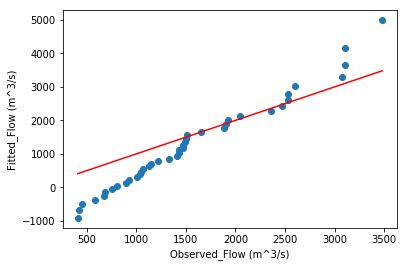

In [38]:
rho_Gumbel_PPCT, p_Gumbel_PPCT = GumbelPPCT(maxQ, alpha_Gumbel_MLE, xi_Gumbel_MLE)
print(rho_Gumbel_PPCT, " " , p_Gumbel_PPCT)

#### (f) GEV using MLE

0.9890818841356909
3578
0.9890818841356909   0.6422


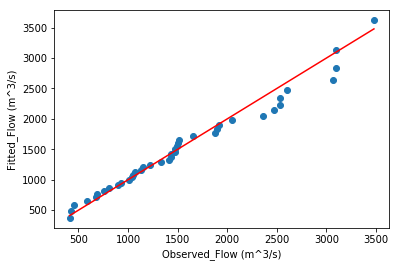

In [39]:
rho_GEV_PPCT, p_GEV_PPCT = GEVPPCT(maxQ, kappa_GEV_MLE, xi_GEV_MLE, alpha_GEV_MLE)
print(rho_GEV_PPCT, " " , p_GEV_PPCT)